# 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

In [1]:
!wget https://nlp100.github.io/data/neko.txt

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/yukimaru/.wget-hsts'. HSTS will be disabled.
--2020-04-06 13:14:58--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.109.153, 185.199.108.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 965825 (943K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 943.19K  1.08MB/s    in 0.9s    

2020-04-06 13:14:59 (1.08 MB/s) - ‘neko.txt’ saved [965825/965825]



In [1]:
from natto import MeCab
nm = MeCab("-d /usr/local/lib/mecab/dic/naist-jdic")
with open('neko.txt') as infile, open('neko.txt.mecab', 'w') as outfile:
    outfile.write(nm.parse(infile.read()))

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [2]:
%%bash
head -4 neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ,,
　	記号,空白,*,*,*,*,　,　,　,,
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ,,
は	助詞,係助詞,*,*,*,*,は,ハ,ワ,,


参考: 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音

In [3]:
def getMorphemeWord(line,param=None):
    row = ["pos","pos1","pos2","pos3","conjt","conjf","base","ruby","pron"]
    surface, left = line.split('\t')
    dic = {"surface": surface}
    for k,v in zip(row,left.split(",")): dic[k] = v
    if param is None: return dic
    else: return {i:dic[i] for i in param}
def getMorphemeSentence(fname,param=None):
    with open(fname) as f:
        res = []
        for line in f:
            if line=="EOS": return res
            r = getMorphemeWord(line)
            if param is None: res.append(r)
            else: res.append({i:r[i] for i in param})
            if r['pos1']=="句点": yield res; res = []
morph = lambda param: getMorphemeSentence('neko.txt.mecab',param)

In [5]:
for i,res in enumerate(morph(["surface","base","pos","pos1"])):
    print(res)
    if i>1: break

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}, {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]
[{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'}, {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]
[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': '生れ', 'base': '生れ

## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [6]:
res = set()
for sen in morph(["surface","pos"]):
    res |= set(m["surface"] for m in sen if m['pos']=="動詞")

for i,elm in enumerate(res):
    print(elm, end=", ")
    if i>15: break

破る, がたつく, 憤, 迂, 解せ, 張れ, 抛, こしらえ, 飛び込ん, 突っ立っ, 切り抜か, おっしゃれ, あえ, 縮ま, 律す, 解さ, 書きゃ, 

## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [7]:
res = set()
for i,sen in enumerate(morph(["base","pos"])):
    res |= set(m["base"] for m in sen if m['pos']=="動詞")

for i,elm in enumerate(res):
    print(elm, end=", ")
    if i>15: break

たつ, 破る, あこがれる, がたつく, 引ける, 持ち切る, 振い落す, 突く, 突き戻す, 心得る, 律す, かこつ, 応じる, 引き揚げる, 崩れる, 疲らす, とく, 

## 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

参考
> 彼	名詞,代名詞,一般,*,*,*,彼,カレ,カレ \
> の	助詞,連体化,*,*,*,*,の,ノ,ノ \
> 掌	名詞,一般,*,*,*,*,掌,テノヒラ,テノヒラ

In [8]:
nos = set()
with open('neko.txt.mecab') as f:
    phrs = [None, getMorphemeWord(f.readline(),["surface","base","pos","pos1"]), getMorphemeWord(f.readline(),["surface","base","pos","pos1"])]
    for i, line in enumerate(f):
        if line=="EOS": continue
        phrs.pop(0)
        phrs.append(getMorphemeWord(line,["surface","base","pos","pos1"]))
        if     phrs[0]['pos'] == phrs[2]['pos'] =="名詞" and phrs[1]['surface']=="の" and phrs[1]["pos1"]=="連体化":
            nos.add("".join([p['surface'] for p in phrs]))
            
for i,elm in enumerate(nos):
    print(elm, end=", ")
    if i>15: break

色の精細, 未来の考, この間の枝, 環視の裡, 当時のまま, 自覚の一助, 夏の半, 天道の主宰, 相貌の末, 渋柿の甘干し, 実の弟, 毛の字, 俺の汁粉, 近来の快事, 近頃の赤ん坊, 口の内, 現象の一つ, 

## 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [9]:
nos = set()
phrs = []
with open('neko.txt.mecab') as f:
    for i, line in enumerate(f):
        if line=="EOS": continue
        res = getMorphemeWord(line,["surface","base","pos","pos1"])
        if res['pos']=="名詞": phrs.append(res)
        elif len(phrs)>1 : nos.add("".join([r['surface'] for r in phrs])); phrs = []
        else: phrs = []
            
for i,elm in enumerate(nos):
    print(elm, end=", ")
    if i>20: break

冷水浴, 幾缶, 一輪, 二丁目, 桐畠, 五杯目, 発作的所為, 日本女子裁縫最高等大学院校長, 曰く火, 君の, 二十五六, 当人大分説, 聟入, ——御酒, 充分垣, 候為め, その後今日, 江戸趣味, 強勢, 幾皿, 一不敬, 一飯君恩, 

## 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [10]:
words = {}
with open('neko.txt.mecab') as f:
    for i, line in enumerate(f):
        if line=="EOS": continue
        key = getMorphemeWord(line,["base"])["base"]
        words.setdefault(key,0)
        words[key]+=1
tens = dict(sorted(words.items(),key=lambda d:d[1], reverse=True)[:10])
print(tens)

{'の': 9198, '。': 7486, 'て': 6777, '、': 6772, 'は': 6418, 'に': 6177, 'を': 6047, 'だ': 5967, 'と': 5486, 'が': 5338}


## 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

<BarContainer object of 10 artists>

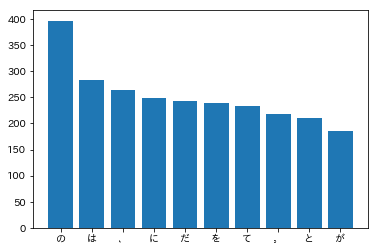

In [15]:
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.bar(tens.keys(), tens.values())

## 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

{'の': 397, 'は': 283, '、': 265, 'に': 248, 'だ': 243, 'を': 239, 'て': 233, '。': 219, 'と': 210, 'が': 185}


<BarContainer object of 10 artists>

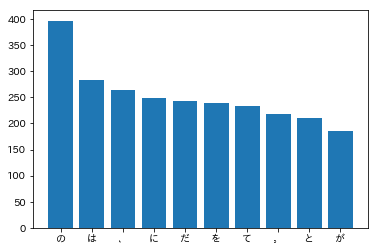

In [12]:
words_cat = {}
for res in morph(["base"]):
    if "猫" in [w["base"] for w in res]:
        for w in res:
          if w['base'] == "猫": continue
          words_cat.setdefault(w['base'],0)
          words_cat[w['base']]+=1
tens = dict(sorted(words_cat.items(),key=lambda d:d[1], reverse=True)[:10])
print(tens)
plt.bar(tens.keys(), tens.values())

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

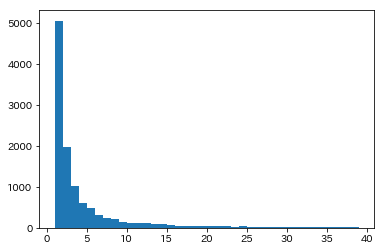

In [13]:
words = {}
with open('neko.txt.mecab') as f:
    for i, line in enumerate(f):
        if line=="EOS": continue
        key = getMorphemeWord(line,["base"])["base"]
        words.setdefault(key,0)
        words[key]+=1
words = dict(sorted(words.items(),key=lambda d:d[1], reverse=True))
plt.hist(words.values(),range(1,40))
plt.show()

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

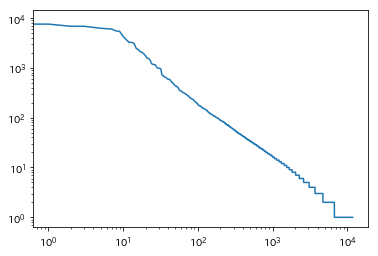

In [14]:
plt.plot(range(len(words)),words.values())
plt.xscale('log')
plt.yscale('log')
plt.show()